In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import auctiondates.auctionFileProcessing as afp

%load_ext autoreload
%autoreload 2

AUCTION_FILENAME = r"auctiondates/UST Auction All Data_20230313.csv"
auction_data = afp.loadJPMFullAuctionTable(AUCTION_FILENAME)
twos = afp.pdGetOneAuctionResults(auction_data, 2)
fives = afp.pdGetOneAuctionResults(auction_data, 5)
display(fives)

,bond_series,num_auctions,5Y Tail,5Y BC,5Y Indirect,5Y Direct,5Y Reopening,5Y SOMA,5Y DepInsts,5Y Individuals,5Y Dealers,5Y Pensions,5Y Investments,5Y Foreigns,5Y AuctionSize,5Y AuctionYield
Date,,,,,,,,,,,,,,,,
2018-03-27,[5Y],1.0,0.3,2.50,63.51186,8.29640,1.0,14.97734,0.00000,0.16327,31.36983,0.07143,53.73740,14.45522,35.0,2.612
2018-04-25,[5Y],1.0,0.0,2.49,60.16251,13.67845,1.0,11.31904,0.00000,0.17542,29.82195,0.07143,55.91280,9.54693,35.0,2.837
2018-05-23,[5Y],1.0,0.2,2.52,56.19378,10.86355,1.0,14.80026,0.13889,0.16159,36.15987,0.13889,54.04516,7.89447,36.0,2.864
2018-06-27,[5Y],1.0,0.4,2.55,62.02808,9.49568,1.0,11.07435,0.13889,0.10134,32.35578,0.00000,55.36409,12.01212,36.0,2.719
2018-07-25,[5Y],1.0,-0.9,2.61,67.21612,8.68697,1.0,5.15044,0.00000,0.09361,26.68961,0.00000,64.69931,7.87025,36.0,2.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,[5Y],1.0,-1.7,2.48,67.97763,15.55846,0.0,0.00000,0.00023,0.48514,18.20185,0.00000,68.13889,13.17389,43.0,4.192
2022-11-21,"[2Y, 5Y]",2.0,0.3,2.39,66.22492,18.70724,0.0,9.80554,0.00176,0.31284,16.83299,0.00000,68.10551,10.68178,43.0,3.970
2022-12-28,[5Y],1.0,0.4,2.46,64.51283,18.56467,0.0,0.00000,0.06087,0.45925,18.44228,0.00000,66.02845,14.99775,43.0,3.973


In [2]:
SPREAD_FILENAME = r"transformers/transformer_data_tufv.csv"

tufv = pd.read_csv(SPREAD_FILENAME, index_col=0, parse_dates=[0])
tufv["Spread"] = tufv["close"]
tufv_spread = tufv[["Spread"]].dropna()
# tufv['Spread'] = tufv['target'].shift(-1)
# tufv_spread = tufv[['Spread']].dropna()
# tufv_spread = tufv_spread['Spread'].resample('D').last()

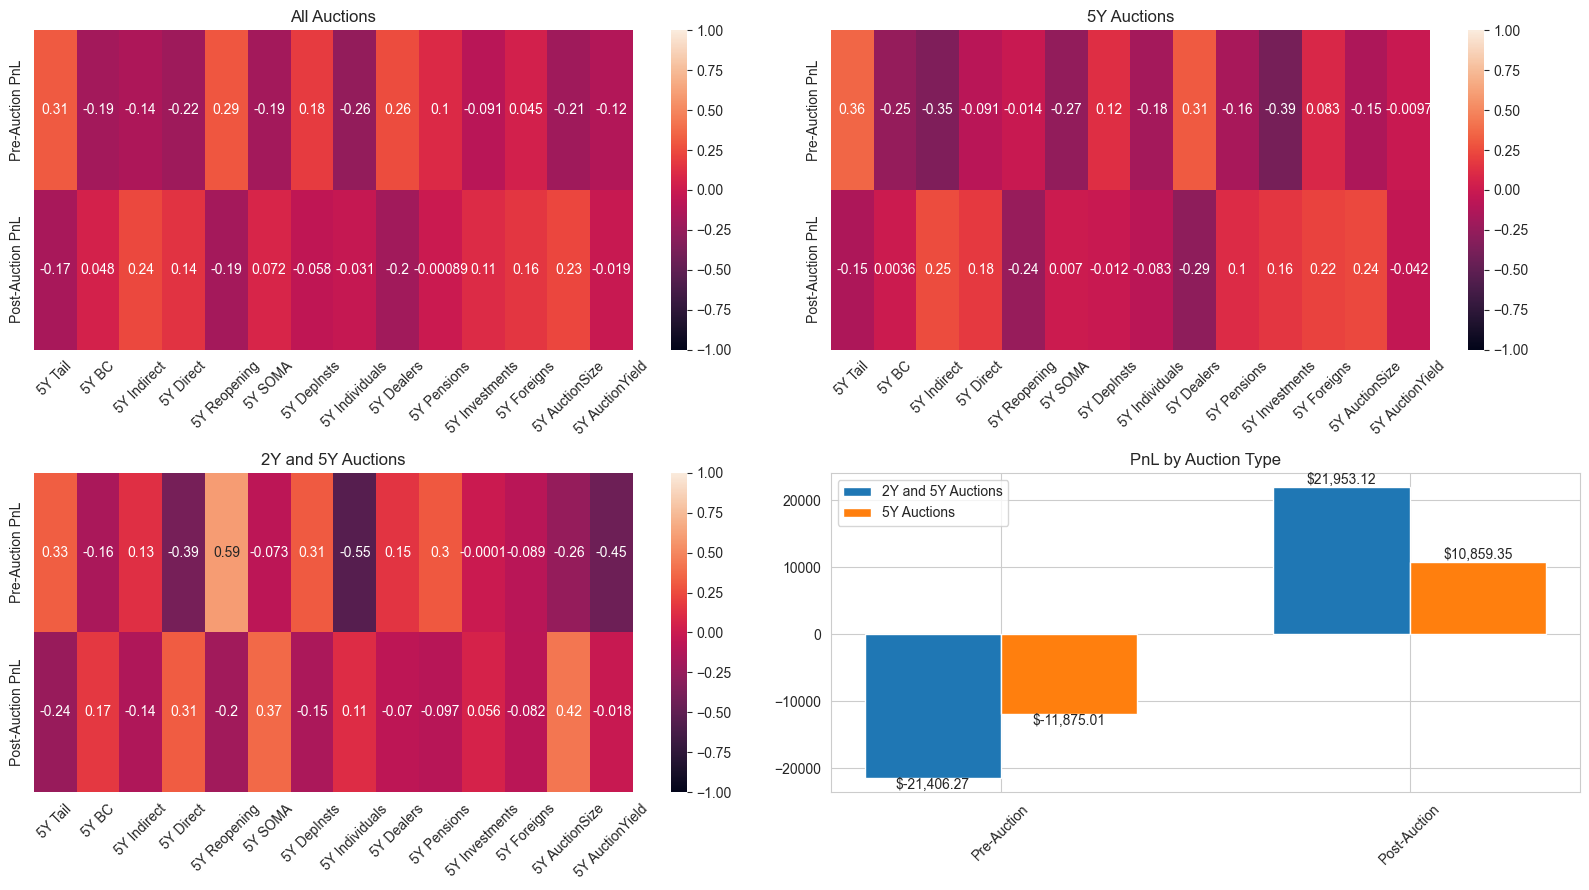

In [3]:
from auction_trading.pnl_calcs import calc_all_trades, plot_single_trade
import seaborn as sns

trades = calc_all_trades(tufv_spread, list(fives.index)[:50], 15, multiplier=10_000)
trades = pd.merge(trades, fives, left_index=True, right_index=True)

fig, axs = plt.subplots(2, 2, figsize=(16, 9))
corrs_all = trades.corr(numeric_only=True)
sns.heatmap(corrs_all.iloc[:2, 3:], annot=True, ax=axs[0, 0], vmin=-1, vmax=1)

# Filter trades to be 5Y or 2Y and 5Y
trades_5y = trades[trades["bond_series"].isin([["5Y"]])]
trades_2y5y = trades[trades["bond_series"].isin([["2Y", "5Y"]])]

# Plot correlations for 5Y trades
corrs_5y = trades_5y.corr(numeric_only=True)
sns.heatmap(corrs_5y.iloc[:2, 3:], annot=True, ax=axs[0, 1], vmin=-1, vmax=1)


# Plot correlations for 2Y and 5Y trades
corrs_2y5y = trades_2y5y.corr(numeric_only=True)
sns.heatmap(corrs_2y5y.iloc[:2, 3:], annot=True, ax=axs[1, 0], vmin=-1, vmax=1)

# Make rotations of ticks 45 degrees
for ax in axs.flat:
    ax.tick_params(axis="x", rotation=45)

# Set titles
axs[0, 0].set_title("All Auctions")
axs[0, 1].set_title("5Y Auctions")
axs[1, 0].set_title("2Y and 5Y Auctions")

# Get PnL by auction type
pnl_5yr_pre, pnl_5yr_post = (
    trades_5y["Pre-Auction PnL"].sum(),
    trades_5y["Post-Auction PnL"].sum(),
)
pnl_2y5y_pre, pnl_2y5y_post = (
    trades_2y5y["Pre-Auction PnL"].sum(),
    trades_2y5y["Post-Auction PnL"].sum(),
)

# Plot bar chart. Make the bars side by side.
width = 0.1
br1 = [0, 0.3]
br2 = [x + width for x in br1]

axs[1, 1].bar(br1, [pnl_2y5y_pre, pnl_5yr_pre], width=width, label="2Y and 5Y Auctions")
axs[1, 1].bar(br2, [pnl_2y5y_post, pnl_5yr_post], width=width, label="5Y Auctions")
axs[1, 1].set_xticks([x + width / 2 for x in br1])
axs[1, 1].set_xticklabels(["Pre-Auction", "Post-Auction"])

rects = axs[1, 1].patches
labels = [
    f"${i:,.2f}" for i in [pnl_2y5y_pre, pnl_5yr_pre, pnl_2y5y_post, pnl_5yr_post]
]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height > 0:
        axs[1, 1].text(
            rect.get_x() + rect.get_width() / 2,
            height + 7,
            label,
            ha="center",
            va="bottom",
        )
    else:
        axs[1, 1].text(
            rect.get_x() + rect.get_width() / 2,
            height - 7,
            label,
            ha="center",
            va="top",
        )

axs[1, 1].set_title("PnL by Auction Type")
axs[1, 1].legend()


fig.tight_layout()

plt.show()

In [39]:
from auction_trading.pnl_calcs import optimize_entry_time

opt = optimize_entry_time(tufv_spread, list(fives.index)[:50])

Optimal entry time: 15.84 days before the auction. Pnl: $33,906.28


In [41]:
calc_all_trades(tufv_spread, list(fives.index)[:50], opt).sum(numeric_only=True)

Pre-Auction PnL      6640.60
Post-Auction PnL    27265.68
dtype: float64